# Conversion analysis and prediction with ML algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_mk = pd.read_csv("digital_marketing_campaign_dataset.csv")
df_mk

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [3]:
# Data overview
df_mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [4]:
# Data Describe
df_mk.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


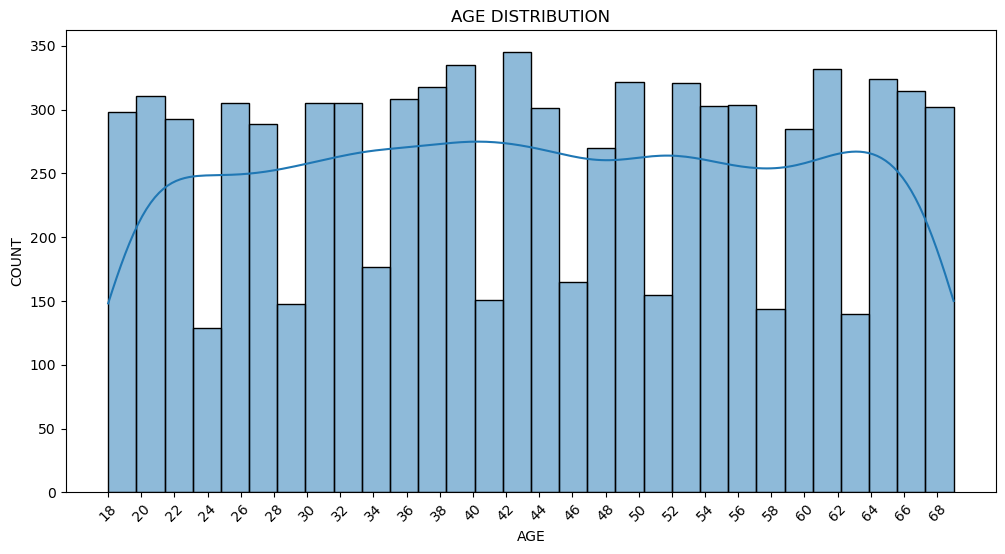

In [5]:
# Age distribution

plt.figure(figsize = (12,6))
sns.histplot(df_mk["Age"], bins = 30, kde = True)
plt.title("AGE DISTRIBUTION")
plt.xlabel("AGE")
plt.ylabel("COUNT")
plt.xticks(np.arange(18,70,2))
plt.xticks(rotation = 45)

plt.show()

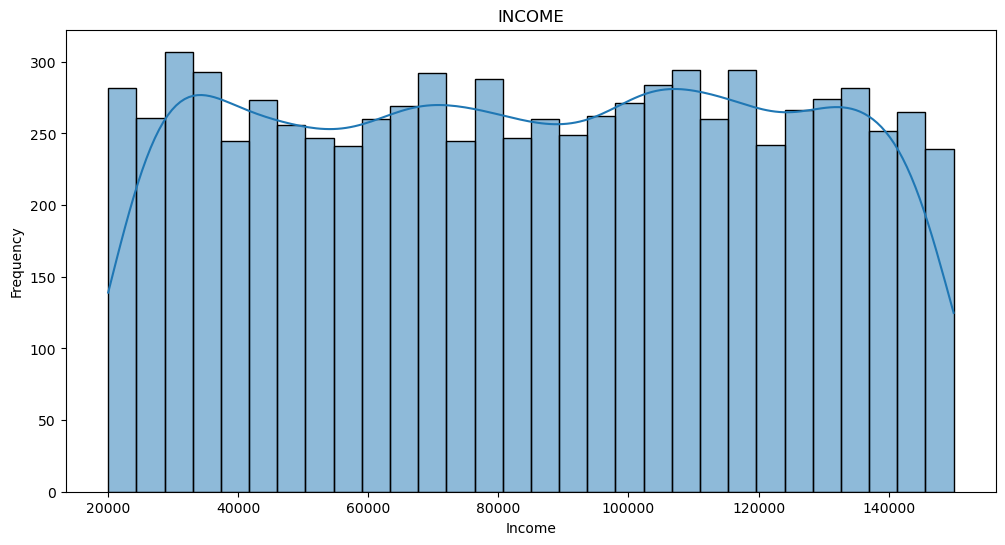

In [6]:
plt.figure(figsize = (12,6))
sns.histplot(df_mk["Income"], bins = 30, kde = True)

plt.title("INCOME")
plt.xlabel("Income")
plt.ylabel("Frequency")

plt.show()

In [7]:
df_mk

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


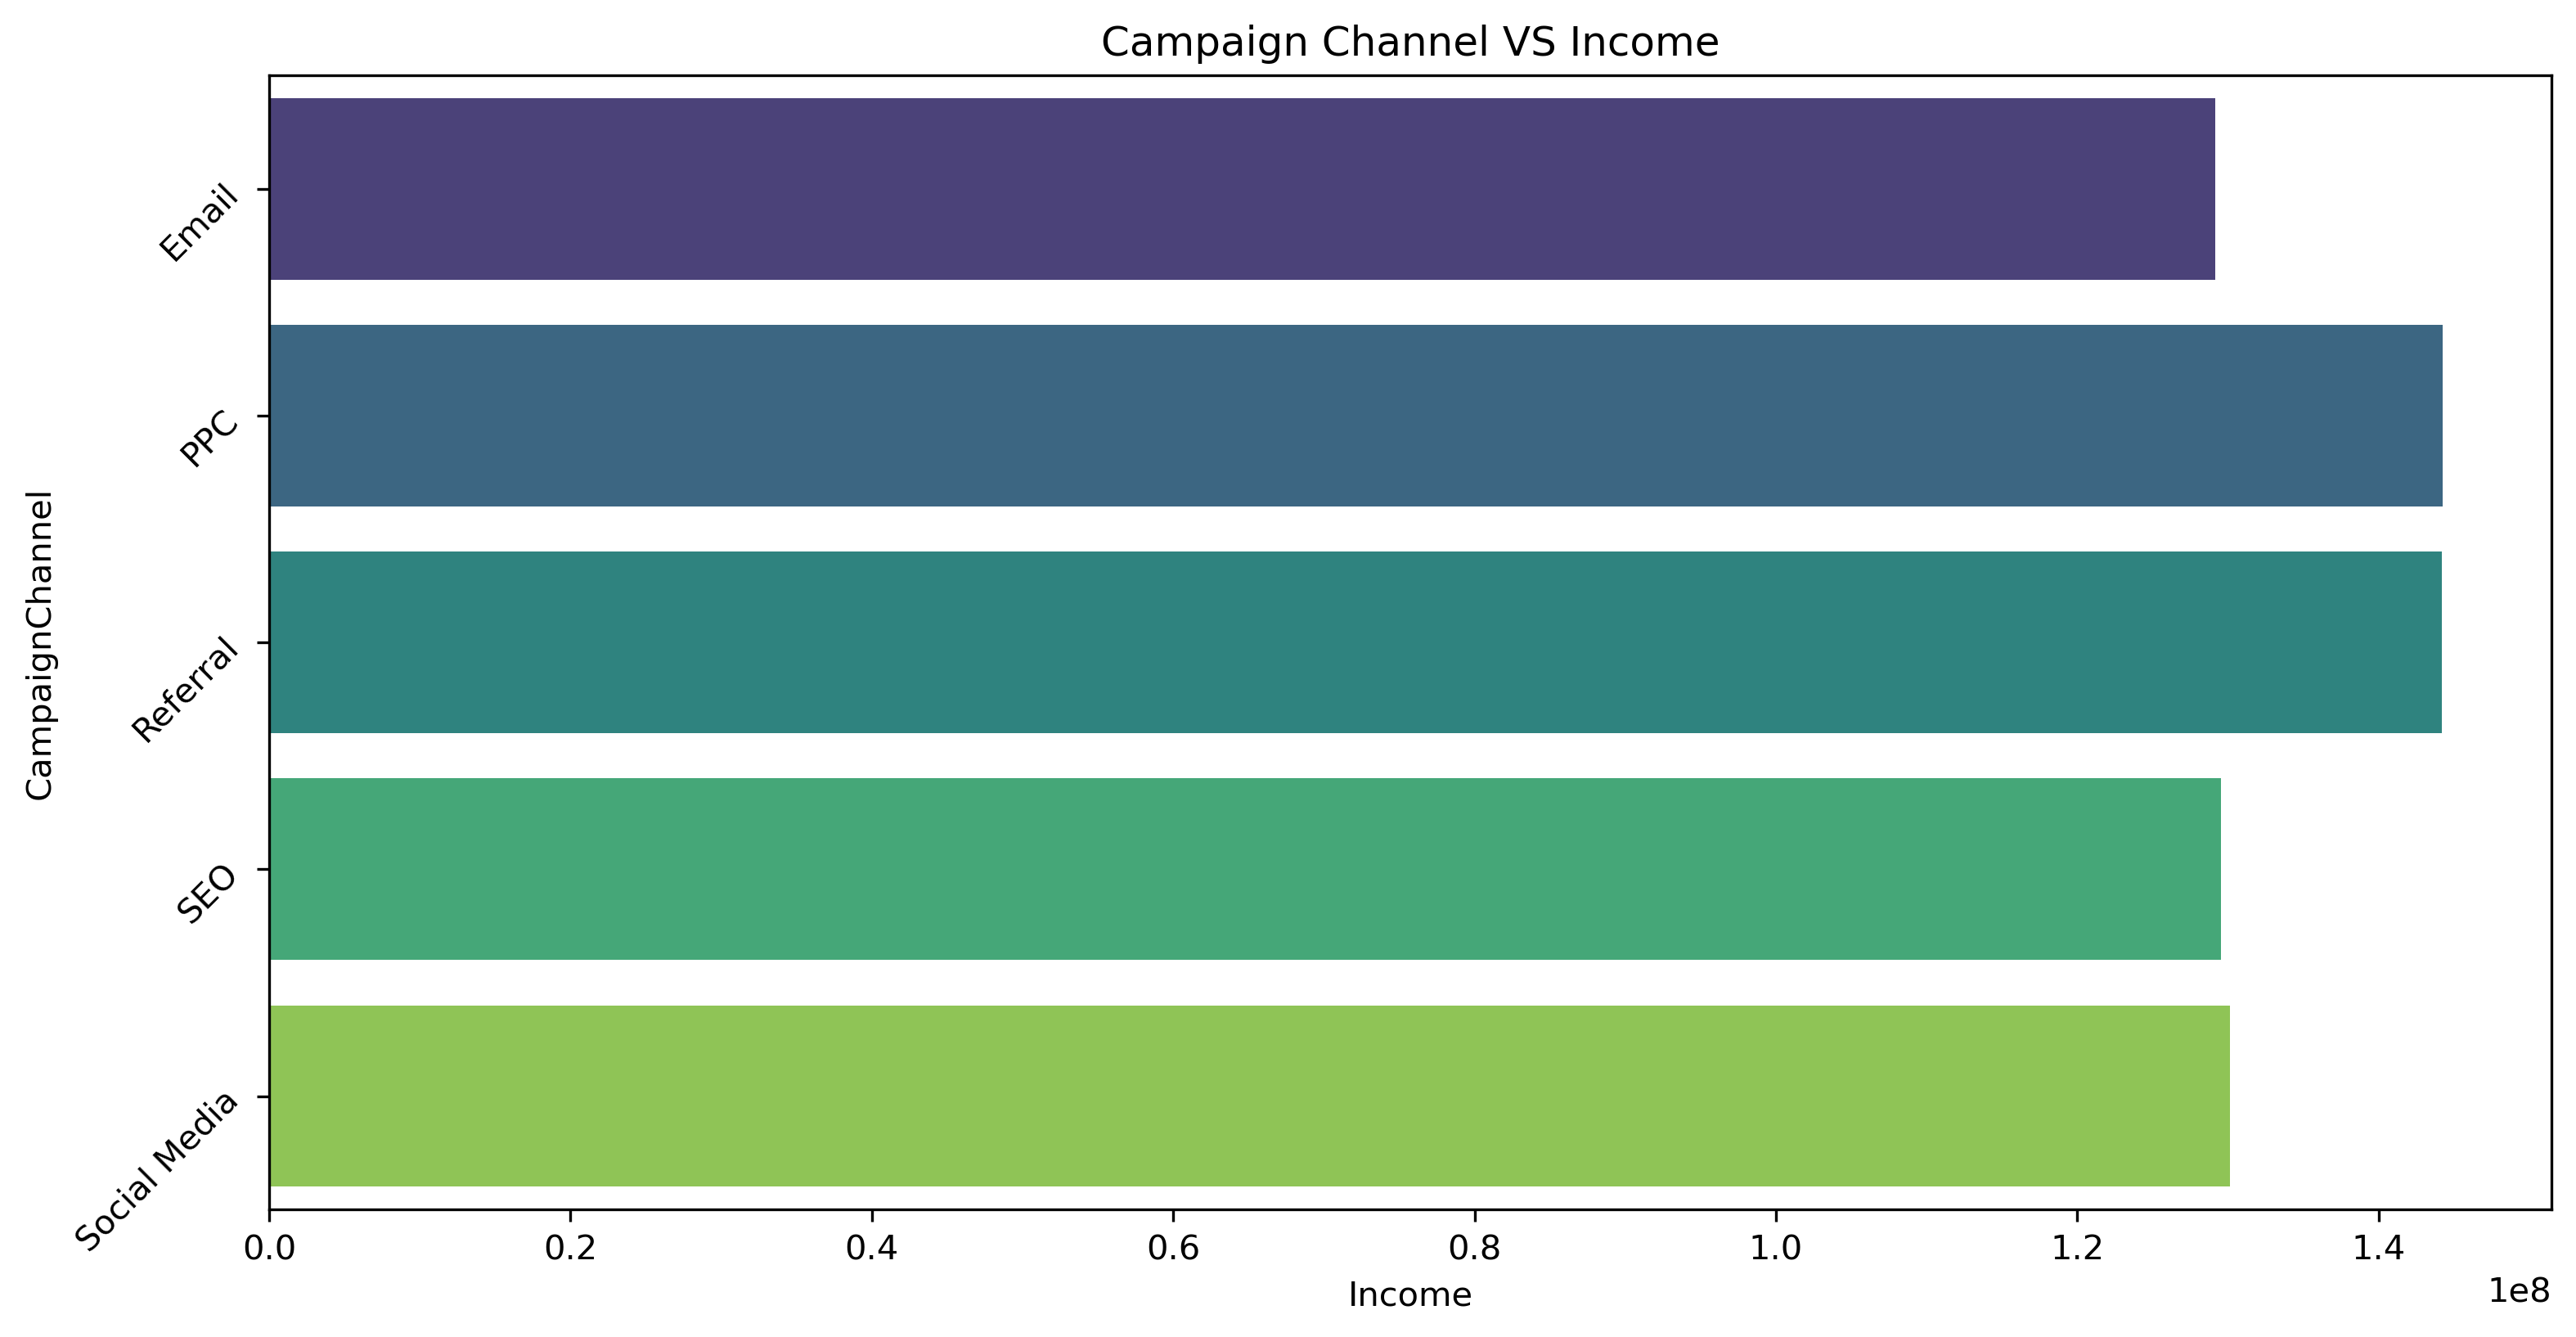

In [8]:
more_income_by_channel = df_mk.groupby("CampaignChannel")["Income"].sum().reset_index()

plt.figure(figsize = (12,6), dpi = 300)
plt.title("Campaign Channel VS Income")
plt.ylabel("Channels")
plt.xlabel("Income")
plt.yticks(rotation=45)
sns.barplot(data = more_income_by_channel, x = "Income", y = "CampaignChannel", palette = "viridis")

plt.show()

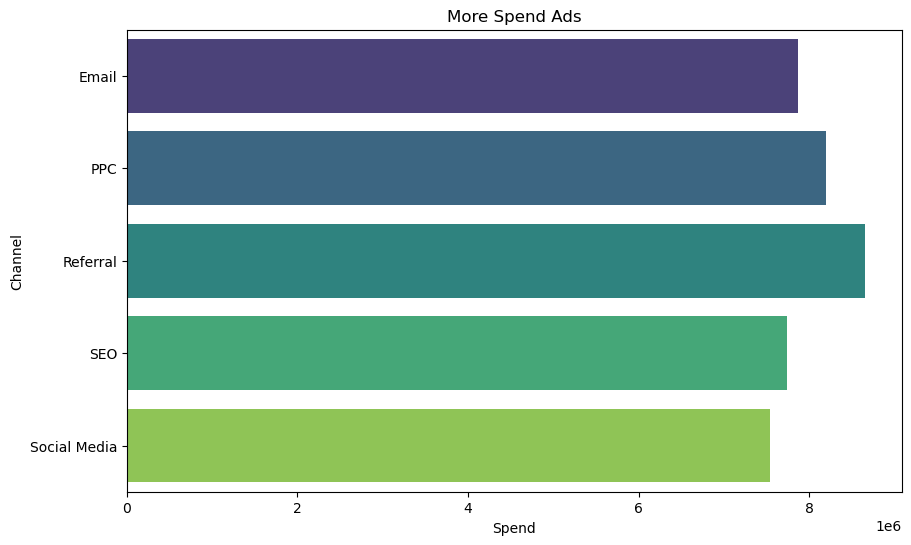

In [9]:
more_spend_ads_campaign = df_mk.groupby("CampaignChannel")["AdSpend"].sum().reset_index()

plt.figure(figsize = (10,6))

sns.barplot(data = more_spend_ads_campaign, x = "AdSpend", y = "CampaignChannel", palette = "viridis")
plt.title("More Spend Ads")
plt.xlabel("Spend")
plt.ylabel("Channel")

plt.show()

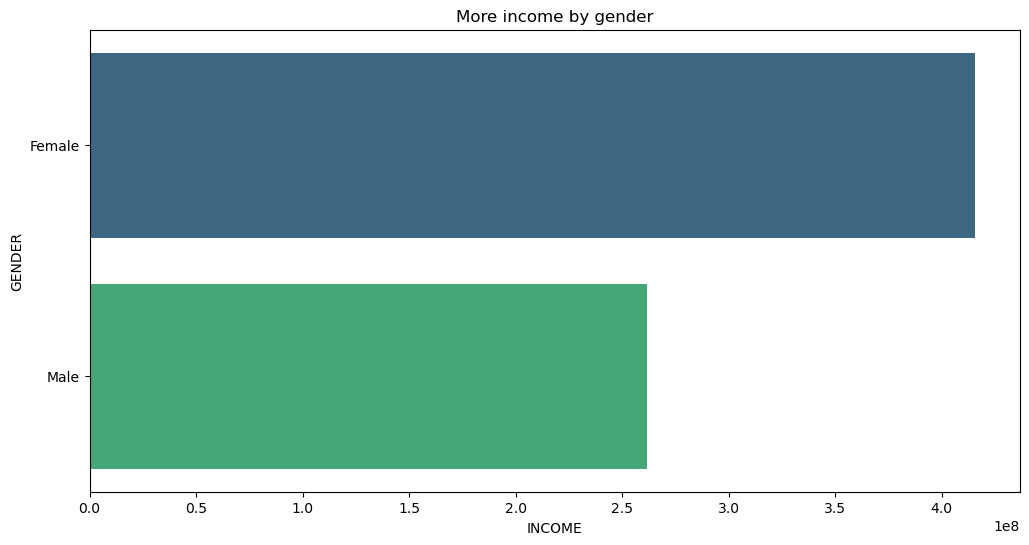

In [10]:
gender_more_income = df_mk.groupby("Gender")["Income"].sum().reset_index()

plt.figure(figsize = (12,6))

sns.barplot(data = gender_more_income, x = "Income" , y  = "Gender", palette = "viridis")
plt.title("More income by gender")
plt.xlabel("INCOME")
plt.ylabel("GENDER")

plt.show()

In [11]:
# only select numerical columns of the data frame 
df_num = df_mk.select_dtypes(include =[np.number])

correlation_matrix = df_num.corr()

In [12]:
correlation_matrix

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
CustomerID,1.000000,-0.003608,0.002310,0.015931,0.005078,0.010161,0.000039,0.000158,-0.013746,-0.011601,-0.003488,-0.003531,-0.012776,-0.023488,-0.180742
Age,-0.003608,1.000000,0.008731,-0.004607,0.011542,0.020027,-0.002078,-0.009280,-0.012998,-0.009531,0.015055,0.008820,-0.007123,0.014049,0.001606
Income,0.002310,0.008731,1.000000,0.003668,0.008080,0.017552,-0.002923,0.003868,0.019404,-0.006297,-0.001506,0.008541,-0.011924,-0.007181,0.013974
AdSpend,0.015931,-0.004607,0.003668,1.000000,-0.008296,-0.020185,0.007265,-0.009256,-0.004335,-0.021058,0.016514,0.001021,0.002378,0.002045,0.124672
ClickThroughRate,0.005078,0.011542,0.008080,-0.008296,1.000000,-0.008161,-0.023148,0.000088,-0.008210,-0.013287,-0.006076,-0.010825,-0.000387,-0.017314,0.120012
ConversionRate,0.010161,0.020027,0.017552,-0.020185,-0.008161,1.000000,-0.012081,0.018789,0.008679,0.008713,0.006449,0.006716,-0.023209,-0.000498,0.093185
WebsiteVisits,0.000039,-0.002078,-0.002923,0.007265,-0.023148,-0.012081,1.000000,-0.011891,-0.022440,0.000328,0.005865,0.003274,0.013739,0.003363,0.079339
PagesPerVisit,0.000158,-0.009280,0.003868,-0.009256,0.000088,0.018789,-0.011891,1.000000,0.016455,0.007888,0.000503,-0.000047,-0.016285,-0.012838,0.102840
TimeOnSite,-0.013746,-0.012998,0.019404,-0.004335,-0.008210,0.008679,-0.022440,0.016455,1.000000,0.001869,-0.004932,0.002099,-0.006494,-0.010952,0.129609
SocialShares,-0.011601,-0.009531,-0.006297,-0.021058,-0.013287,0.008713,0.000328,0.007888,0.001869,1.000000,-0.012028,0.003214,-0.012635,-0.004575,-0.011449


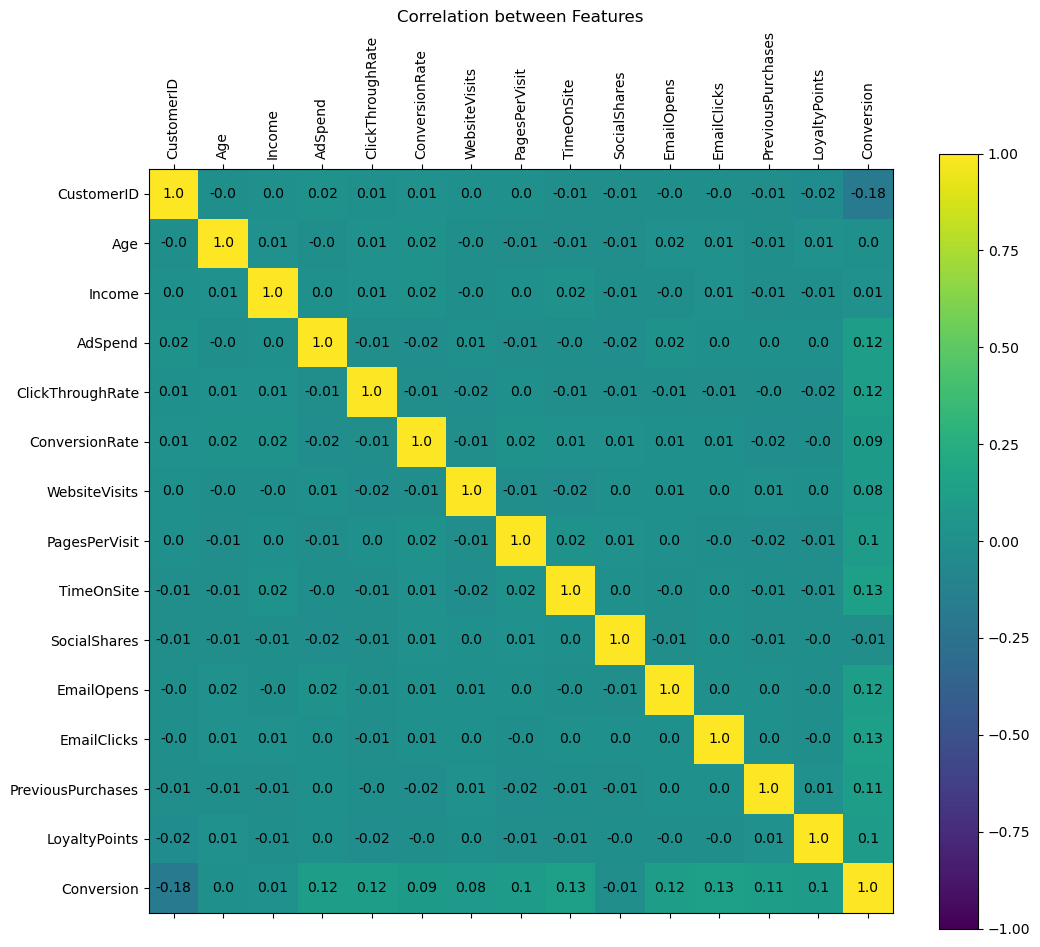

In [13]:
# Plot our Heatmap
plt.figure(figsize=(12, 10))  

plt.matshow(correlation_matrix, cmap="viridis", vmin=-1, vmax=1, fignum=1)
plt.xticks(range(correlation_matrix.shape[1]), df_num.columns, rotation=90)
plt.yticks(range(correlation_matrix.shape[1]), df_num.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(i, j, round(correlation_matrix.iloc[i, j], 2),
                 ha="center", va="center")

plt.title("Correlation between Features")
plt.colorbar()
plt.show()

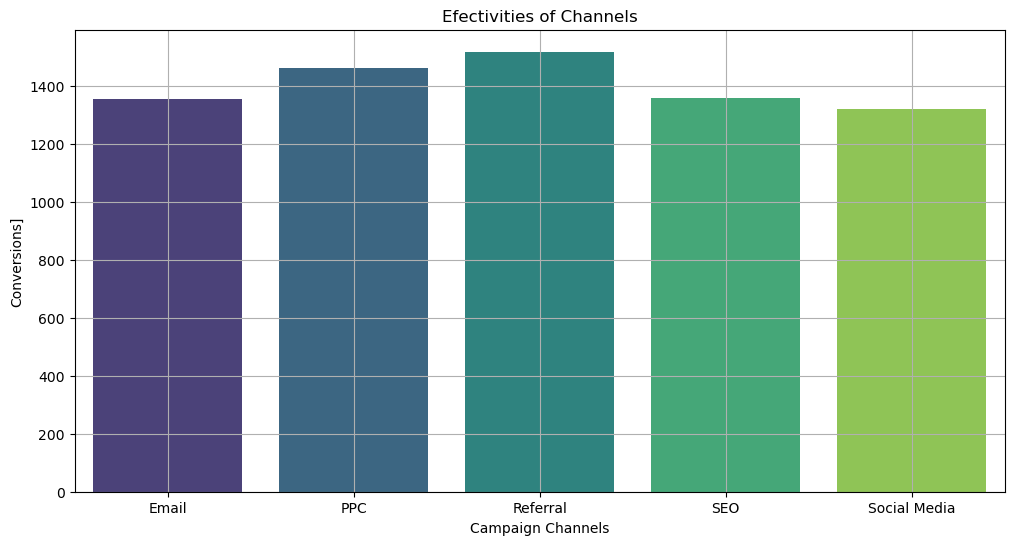

In [14]:
# more efective campaign for a make leads 

efective_campaigns = df_mk.groupby("CampaignChannel")["Conversion"].sum().reset_index()

plt.figure(figsize = (12,6))
sns.barplot(data = efective_campaigns, x = "CampaignChannel", y = "Conversion", palette = "viridis")

plt.title("Efectivities of Channels")
plt.xlabel("Campaign Channels")
plt.ylabel("Conversions]")
plt.grid(True)

plt.show()

# Use of algorithms for conversion prediction under marketing campaign

# Using LogisticRegression

In [15]:
# Define the feature matrix X and the target y 
X = df_mk.drop(columns=(["CustomerID", "Conversion"])) 
y = df_mk["Conversion"]

# Convert categorical variables to dummies variables

X = pd.get_dummies(X, drop_first = True)

# split into training data and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

# Standarize the features matrix 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize and train the logistic Regression 
model = LogisticRegression()
model.fit(X_train, y_train)

# Make prediction on the test side
y_pred = model.predict(X_test)

In [16]:
# Evaluation of Logistic Regression model

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print("\n Accuracy Score:")
print(accuracy_score(y_test,y_pred),"%")


 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.20      0.32       331
           1       0.89      1.00      0.94      2069

    accuracy                           0.89      2400
   macro avg       0.88      0.60      0.63      2400
weighted avg       0.88      0.89      0.85      2400


 Accuracy Score:
0.885 %


In [17]:
le = LabelEncoder()
col = ["Gender", "CampaignChannel","CampaignType","AdvertisingPlatform","AdvertisingTool"]
for i in col:
    df_mk[i] = le.fit_transform(df_mk[i])

In [18]:
df_mk.drop(columns = ["AdvertisingPlatform","AdvertisingTool","CustomerID"], axis = 1, inplace = True)

In [19]:
y = df_mk["Conversion"]
X = df_mk.drop(columns = ["Conversion"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 85)

# Using XGBClassifier


In [20]:
xgb = XGBClassifier(n_estimators = 400, max_depth = 12, random_state = 99)
model = xgb.fit(X_train, y_train)
model.score = (X_test, y_test)

In [21]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f1)

0.953103448275862


In [22]:
print("Accuracy")
print(accuracy_score(y_test, y_pred),"%")

Accuracy
0.915 %


In [23]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.40      0.55       205
           1       0.92      0.99      0.95      1395

    accuracy                           0.92      1600
   macro avg       0.89      0.70      0.75      1600
weighted avg       0.91      0.92      0.90      1600



# Using RandomForestClassifier


In [24]:
model_forest = RandomForestClassifier(n_estimators = 400, max_depth = 12, random_state = 85)

In [25]:
y = df_mk["Conversion"]
X = df_mk.drop(columns = ["Conversion"], axis = 1)
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 85)

In [26]:
model_forest_fi = model_forest.fit(X_train, y_train)

In [27]:
y_pred = model_forest_fi.predict(X_test)
f1_rf = f1_score(y_test, y_pred)
print(f1_rf)

0.9402228976697062


In [28]:
print("Acurracy")
print(accuracy_score(y_test, y_pred))

Acurracy
0.889375


In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.15      0.26       205
           1       0.89      1.00      0.94      1395

    accuracy                           0.89      1600
   macro avg       0.90      0.57      0.60      1600
weighted avg       0.89      0.89      0.85      1600



# Future Analysis
There are many directions we could take for future analysis:

* Advanced Models: More complex models with better hyperparameters and using a gridsearch cv multi-builder to obtain them.
* Time Series Analysis: If we had time-based data, we could analyze trends over time.
* A/B Testing: Analyze the effectiveness of different campaign strategies.

-Daniel Pulido